In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import geoplot
import geopandas as gpd
import os
from src.const import order
import gurobipy as gp
from gurobipy import GRB

### 省份顺序

### 消费端

In [2]:
transport = pd.read_csv("../data/transport.csv", usecols=["province", "h2"])
transport = transport.set_index("province")
transport = transport.loc[order]
transport_total = transport["h2"].sum()
transport_total

251828959.72985378

In [3]:
industry = pd.read_csv("../data/industry.csv", usecols=["province", "h2"])
industry = industry.set_index("province")
industry = industry.loc[order]
industry_total = industry["h2"].sum()
industry_total

487410889.7997169

In [4]:
U_total = transport_total + industry_total

In [5]:
h2_cons = industry + transport

In [6]:
h2_cons["h2"].sum()

739239849.5295707

### 生产端

In [7]:
gen_range = pd.read_csv("../data/h2_max.csv", index_col="Province")  # 单位：吨
gen_range = gen_range.loc[order]
gen_range

,rest
Province,
Inner Mongolia,3.884657e+08
Heilongjiang,4.140963e+07
Jilin,2.376556e+07
Liaoning,1.346732e+07
Gansu,8.770031e+07
Ningxia,8.380752e+06
Qinghai,1.288135e+08
Shaanxi,1.120271e+07
Xinjiang,5.657960e+08


In [8]:
gen_range["rest"].sum()

1624702965.9990566

### 运输管道

In [9]:
NGtable = pd.read_csv(
    "../data/NGtable.csv", index_col=0
)  # 单位：bcm, 长距离输气管道压力：一般在4～10Mpa,保守起见， 当掺氢比达到 20%时， 就可运输1000 多万吨氢气
NGtable_h2 = NGtable * 1e9 * 0.000089 * 0.2
NGtable_h2  # 单位：吨
# 不对称

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.0,0.0,0.0,0.0,0.0,51442.0,0.0,2314.0,0.0,149164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heilongjiang,13350.0,0.0,676400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jilin,10324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liaoning,41474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gansu,0.0,0.0,0.0,0.0,0.0,62300.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qinghai,0.0,0.0,0.0,0.0,94340.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shaanxi,0.0,0.0,0.0,0.0,17800.0,19224.0,0.0,0.0,0.0,996800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xinjiang,0.0,0.0,0.0,0.0,0.0,1780000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1513000.0,0.0,302600.0,0.0
Beijing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 通过天然气管道可运输的氢气总量
NGtable_h2.sum().sum()

18513780.0

In [11]:
PHtable = pd.read_csv("../data/PHtable.csv", index_col=0)
PHtable

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0,0,0,0,0,0,0,0,0,500000,...,0,0,0,0,0,0,0,0,0,0
Heilongjiang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jilin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Liaoning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gansu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ningxia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Qinghai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shaanxi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xinjiang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beijing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dist = pd.read_csv("../data/distance.csv", index_col=0)  # 单位：km,省会之间的球面距离
dist = dist.loc[order]
dist1 = dist.reindex(columns=order)
dist1.to_csv("../data/distance_order.csv")

In [13]:
dist1[dist1>0].min()  #只有天津到北京的距离为110，小于150km

Inner Mongolia     445.522850
Heilongjiang       464.888496
Jilin              281.716395
Liaoning           281.716395
Gansu              276.290487
Ningxia            276.290487
Qinghai            628.474606
Shaanxi            430.154818
Xinjiang          1109.744622
Beijing            110.003361
Hebei              192.933531
Shandong           201.930688
Shanxi             259.315353
Tianjin            110.003361
Chongqing          259.819291
Guizhou            334.608930
Sichuan            259.819291
Tibet              850.428854
Guangdong          459.914771
Guangxi            376.282297
Hainan             376.282297
Yunnan             432.912463
Henan              358.921098
Hubei              261.983469
Hunan              288.223334
Jiangxi            261.983469
Anhui              236.814882
Fujian             373.786123
Jiangsu            192.398329
Shanghai           165.833526
Zhejiang           165.833526
dtype: float64

### gurobi求解器

### 添加变量

In [14]:
NGtable_h2  #有很多省份之间没有天然气管道，就算有，可能方向也不对，我们假设天然气管道不能倒输气。除非考虑将天然气管道改造成纯氢管道。

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.0,0.0,0.0,0.0,0.0,51442.0,0.0,2314.0,0.0,149164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heilongjiang,13350.0,0.0,676400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jilin,10324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liaoning,41474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gansu,0.0,0.0,0.0,0.0,0.0,62300.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qinghai,0.0,0.0,0.0,0.0,94340.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shaanxi,0.0,0.0,0.0,0.0,17800.0,19224.0,0.0,0.0,0.0,996800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xinjiang,0.0,0.0,0.0,0.0,0.0,1780000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1513000.0,0.0,302600.0,0.0
Beijing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
model = gp.Model("H2")

G, N, P = {}, {}, {}
for a in order:
    G[a] = model.addVar(
        name="G_%s" % a, ub=gen_range.loc[a, "rest"], vtype=GRB.CONTINUOUS
    )

for a in order:
    gen_range.loc[a, "rest"] - h2_cons.loc[a, "h2"]
    for b in order:
        N[a, b] = model.addVar(
            name="N_%s,%s" % (a, b),
            lb=-NGtable_h2.loc[a, b],
            ub=NGtable_h2.loc[a, b],
            vtype=GRB.CONTINUOUS,
        )
        P[a, b] = model.addVar(
            name="P_%s,%s" % (a, b), lb=-GRB.INFINITY, vtype=GRB.CONTINUOUS
        )


x = model.addVars(order, order, vtype=GRB.BINARY, name="x")  # 是否新建纯氢管道，假设不建天然气管道
ABSN = model.addVars(order, order, vtype=GRB.CONTINUOUS, lb=0)
ABSP = model.addVars(order, order, vtype=GRB.CONTINUOUS, lb=0)
model.update()

# 更简便的变量定义 G = model.addVars(order, name="G", lb=0)
# N=model.addVars(set(order),set(order),name="N")    后续引用直接G[i] N[i,j]

### 添加目标

In [71]:
NGpipe_buildcost = 25  # 万$/km，没有用到
PHpipe_buildcost = 63
NGpipe_transcost = 0.515  # 万$/吨
PHpipe_transcost = 0.2  # 这个是乱写的
capacity_buildcost = 0.000001  # 这个是乱写的
electricity_cost=53*0.5/7*0.0001 #53度电电解1kg,假设电价为0.5元/度，CNY-->万$

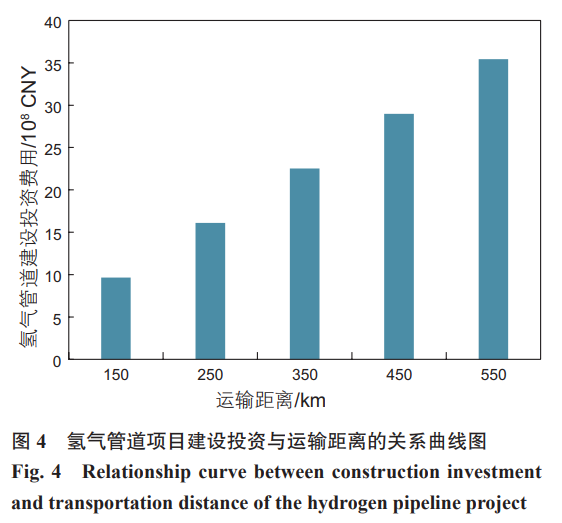
### 用函数拟合PHpipe_buildcost于distant的关系，精细化
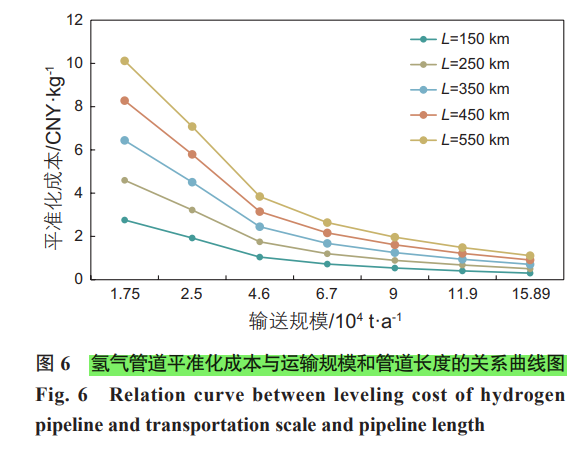

In [72]:
objective = 0.5 * gp.quicksum(
    (NGpipe_transcost * ABSN[i, j] for i in order for j in order)
)
objective += gp.quicksum(
    (
        x[i, j]
        * PHpipe_buildcost
        * dist.loc[i, j]
        * capacity_buildcost
        * (P[i, j] - PHtable.loc[i, j])
        + 0.5 * PHpipe_transcost * ABSP[i, j]
        for i in order
        for j in order
    )
)  # buildcost也需要和capacity:P[i,j]-PHtable.loc[i,j]成正比,且只要输气就有输送成本，不管在已建成的管道还是新建的管道
objective += electricity_cost * gp.quicksum(G[i] for i in order)
model.setObjective(objective, sense=GRB.MINIMIZE)
model.update()

### 添加约束

In [73]:
M = 1e14
for i in order:
    for j in order:
        model.addConstr(N[i, j] + N[j, i] == 0)  # 约束1：反对称矩阵
        model.addConstr(P[i, j] + P[j, i] == 0)


for i in order:
    model.addConstr(
        G[i] >= h2_cons.loc[i].values[0] + sum(P[i, j] + N[i, j] for j in order)
    )  # 约束2：每个省的氢的生产=消耗+输入/输出，后续可以在h2_use上再考虑出口。


for i in order:  # 约束3：中间0-1变量x的处理:expresion <=  M * x <= M + expression - B
    for j in order:
        model.addConstr(x[i, j] * M >= P[i, j] - PHtable.loc[i, j])

for i in order:
    for j in order:
        model.addConstr(x[i, j] * M <= M + P[i, j] - PHtable.loc[i, j] - 1)

for i in order:
    for j in order:
        model.addGenConstrAbs(ABSN[i, j], N[i, j])  # 约束4：在算成本的时候以防相消
        model.addGenConstrAbs(ABSP[i, j], P[i, j])

# (P[i,j]-PHtable.loc[i,j])< 50*x

### 求解

In [74]:
model.optimize()
# model.computeIIS()  #infeasible 时用
# model.write("model1.ilp")

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 7 6800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3875 rows, 4836 columns and 9579 nonzeros
Model fingerprint: 0xceec25ea
Model has 930 quadratic objective terms
Model has 1922 general constraints
Variable types: 3875 continuous, 961 integer (961 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+14]
  Objective range  [4e-04, 1e+04]
  QObjective range [1e-02, 5e-01]
  Bounds range     [1e+00, 6e+08]
  RHS range        [5e+05, 1e+14]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve added 365 rows and 0 columns
Presolve removed 0 rows and 2465 columns
Presolve time: 0.03s
Presolved: 6100 rows, 5161 columns, 15899 nonzeros
Presolved model has 1860 SOS constraint(s)
Variable types: 3765 continuous, 1396 integer (1396 binar

In [75]:
df_P = pd.DataFrame(index=order, columns=order)
for i in order:
    for j in order:
        df_P.loc[i, j] = P[i, j].X
modify_P = df_P[(df_P > 2) | (df_P < -2)].fillna(0)
modify_P.to_csv("../result/modify_P.csv")

In [76]:
df_N = pd.DataFrame(index=order, columns=order)
for i in order:
    for j in order:
        df_N.loc[i, j] = N[i, j].X
df_N.to_csv("../result/df_N.csv")

In [22]:
NGtable_h2

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.0,0.0,0.0,0.0,0.0,51442.0,0.0,2314.0,0.0,149164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heilongjiang,13350.0,0.0,676400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jilin,10324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liaoning,41474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gansu,0.0,0.0,0.0,0.0,0.0,62300.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qinghai,0.0,0.0,0.0,0.0,94340.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shaanxi,0.0,0.0,0.0,0.0,17800.0,19224.0,0.0,0.0,0.0,996800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xinjiang,0.0,0.0,0.0,0.0,0.0,1780000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1513000.0,0.0,302600.0,0.0
Beijing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
h2_cons.loc["Shaanxi"]

h2    2.366557e+07
Name: Shaanxi, dtype: float64

In [24]:
2.366557e+07-1.120271e+07-534000

11928860.0

In [25]:
df_N

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heilongjiang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jilin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Liaoning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gansu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qinghai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shaanxi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xinjiang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beijing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
modify_P

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,8.288634e+06,...,0.000000e+00,0.000000e+00,1.914381e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.553834e+07,4.817885e+07,1.682051e+07,3.709756e+07
Heilongjiang,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Jilin,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.603994e+07,0.000000e+00,0.000000e+00
Liaoning,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Gansu,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Ningxia,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Qinghai,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.169024e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Shaanxi,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Xinjiang,0.000000e+00,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.065063e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Beijing,-8.288634e+06,0,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [77]:
PHbuild=modify_P-PHtable
modify_x = PHbuild[PHbuild > 2].fillna(0)
modify_x = modify_x[modify_x < 2].fillna(1)
modify_x

,Inner Mongolia,Heilongjiang,Jilin,Liaoning,Gansu,Ningxia,Qinghai,Shaanxi,Xinjiang,Beijing,...,Yunnan,Henan,Hubei,Hunan,Jiangxi,Anhui,Fujian,Jiangsu,Shanghai,Zhejiang
Inner Mongolia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Heilongjiang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jilin,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Liaoning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gansu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qinghai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shaanxi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xinjiang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beijing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
sum([modify_x.loc[i, j] for i in order for j in order])

24.0

In [29]:
sum([G[i].X for i in order])

739239849.5295709

In [30]:
h2_cons.h2.sum()

739239849.5295707

### 结果可视化

In [49]:
from visualization_PHpipe import visualization_PHpipe

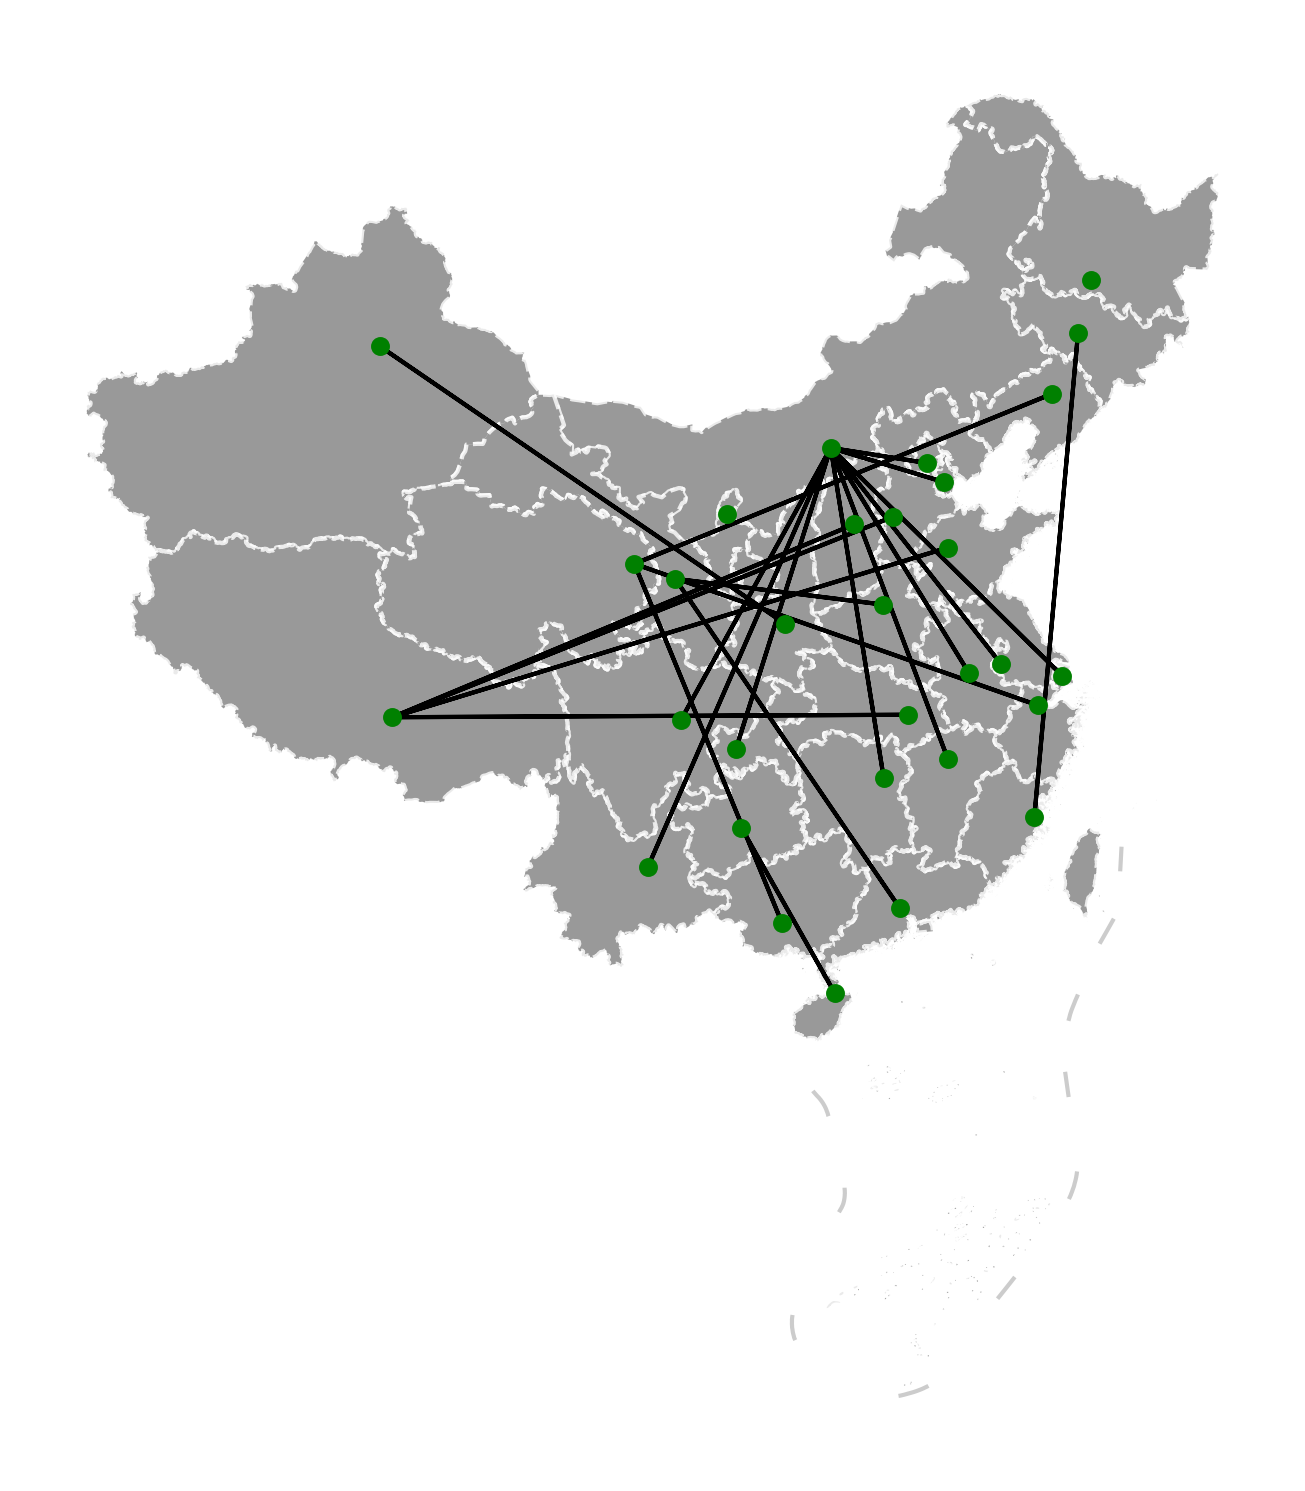

In [50]:
fig = visualization_PHpipe(modify_x, N, P)
plt.savefig("../result/fig1.pdf")

### 画容量图

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


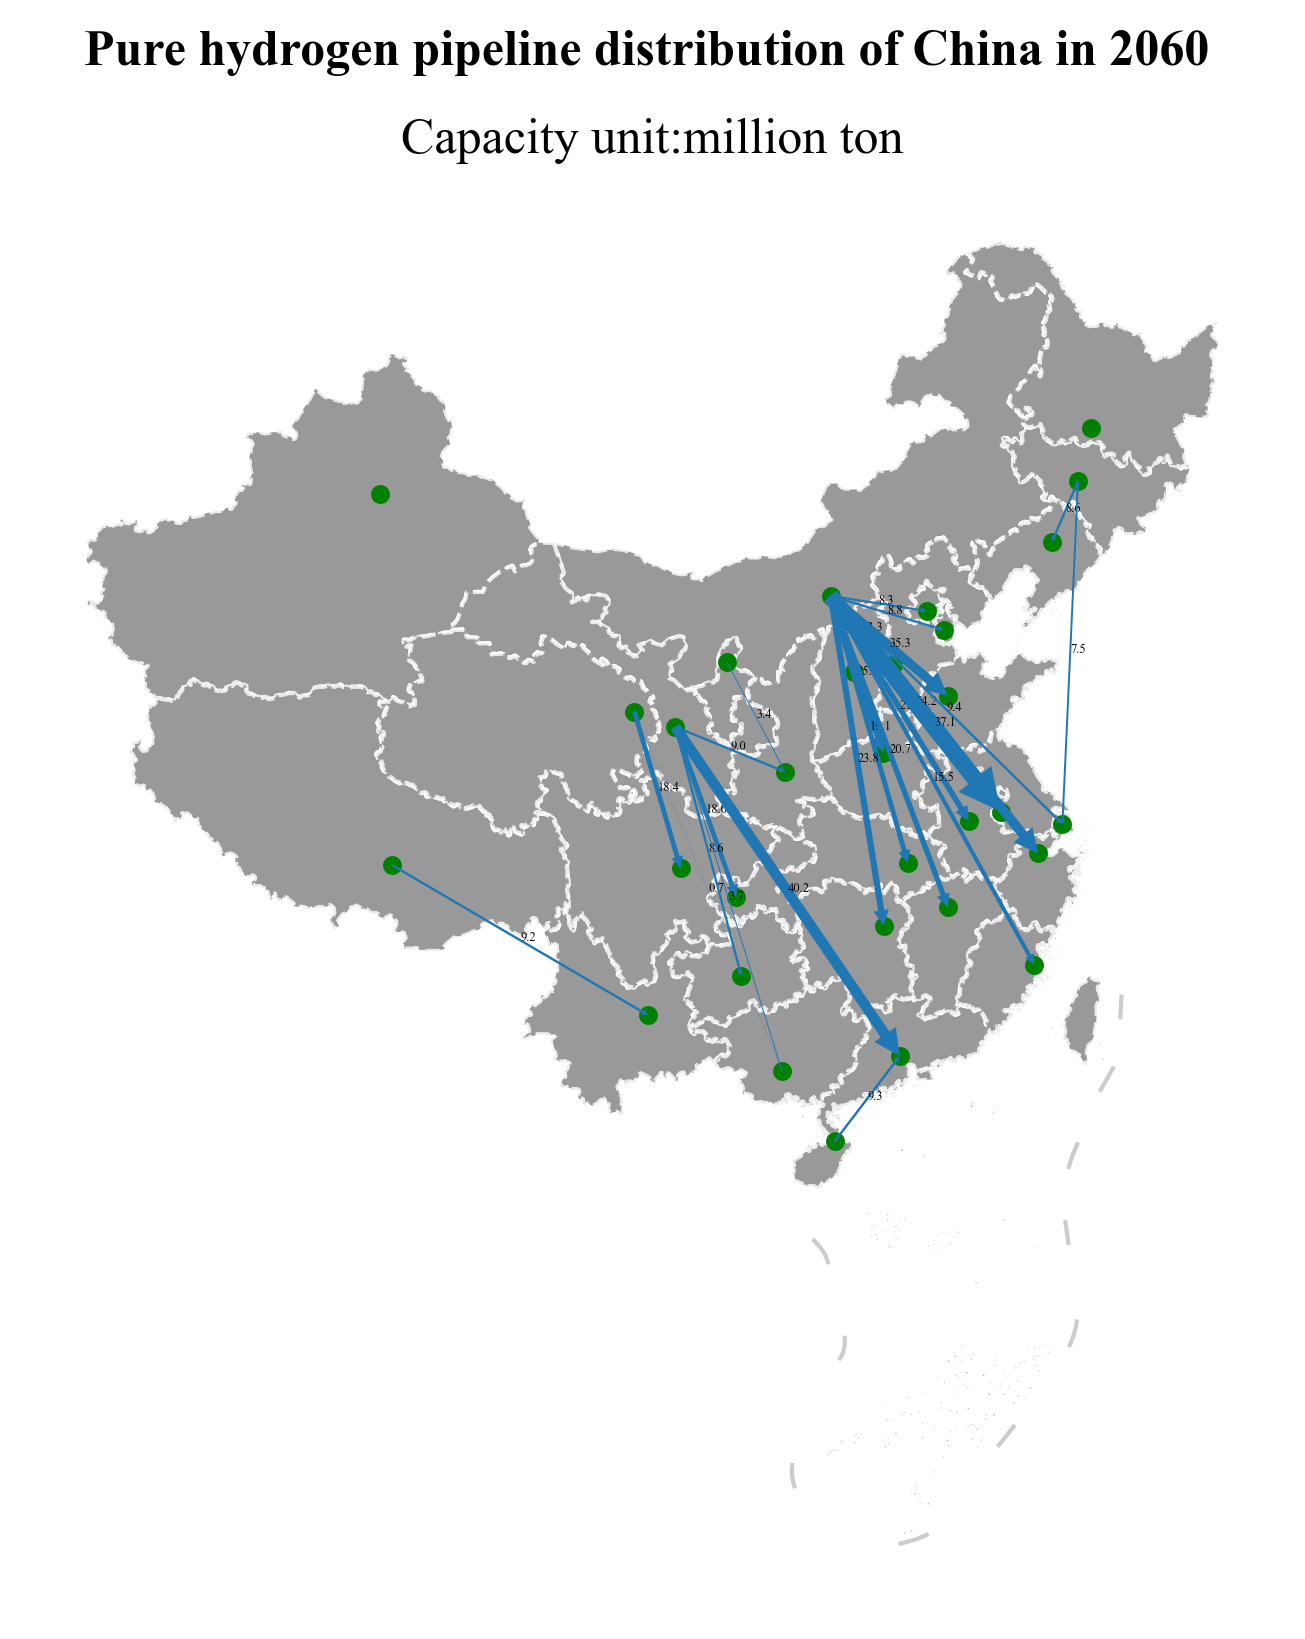

In [78]:
from visualization import draw_sankey

draw_sankey(modify_x, N, P)
plt.savefig("../result/fig2.pdf")

### 获得任意两点之间的最短成本路径，在此基础上再规划和调度一起做

In [34]:
from visualization_generation import visualization_generation,visualization_consumption,visualization_gen_con

d:\conda\envs\geopy\lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


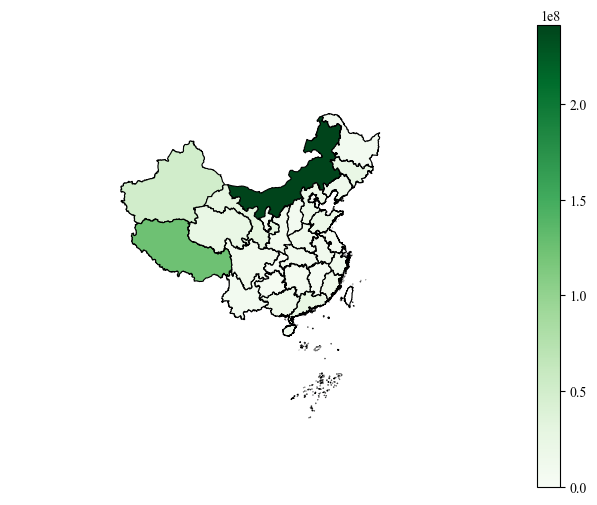

In [35]:
visualization_generation(G)

In [36]:
from visualization_generation import visualization_consumption

d:\conda\envs\geopy\lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


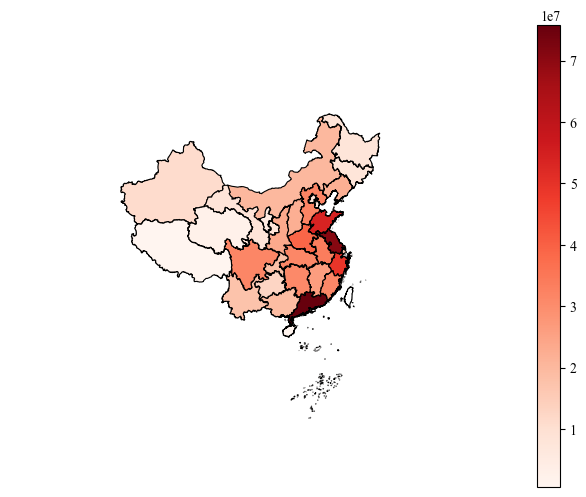

In [37]:
visualization_consumption(h2_cons)

d:\conda\envs\geopy\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\geopy\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\geopy\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\geopy\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\geopy\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\g

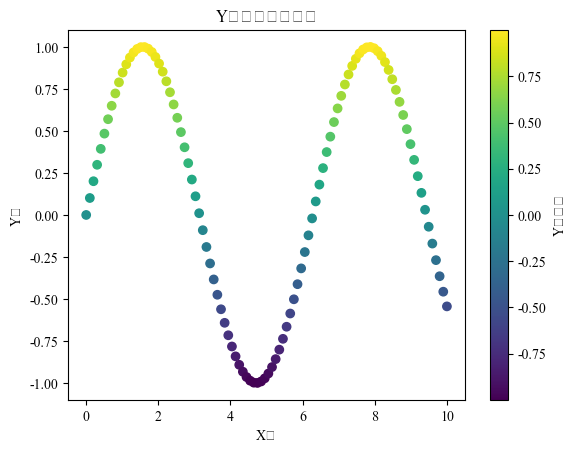

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
a = np.linspace(0, 10, 100)
y = np.sin(a)

# # 设置线条粗细来表现值的大小
# line_width = y * 2  # y值越大，线条越粗
# plt.plot(a, y, linewidth=line_width)

# 设置线条颜色来表现值的大小
plt.scatter(a, y, c=y, cmap="viridis")  # 使用'viridis'颜色映射

# 添加颜色标注
cbar = plt.colorbar()
cbar.set_label("Y值大小")

# 添加图表标题和坐标轴标签
plt.title("Y值大小的可视化")
plt.xlabel("X轴")
plt.ylabel("Y轴")

# 显示图表
plt.show()

In [2]:
%pip install chardet

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     -------------------------------------- 199.4/199.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests

### 法2

### 分析结果

### scikit-opt启发式算法

In [39]:
def my_func(x):
    (
        x1,
        x2,
        x3,
        x4,
        x5,
        x6,
        x7,
        x8,
        x9,
        x10,
        x11,
        x12,
        x13,
        x14,
        x15,
        x16,
        x17,
        x18,
        x19,
        x20,
        x21,
        x22,
        x23,
        x24,
        x25,
        x26,
        x27,
        x28,
        x29,
        x30,
        x31,
    ) = x
    return

In [40]:
ga = GA(func=_func, lb=[0] * len(gen_range), ub=list(gen_range["rest"]), max_iter=500)
best_x, best_y = ga.fit()

NameError: name 'GA' is not defined